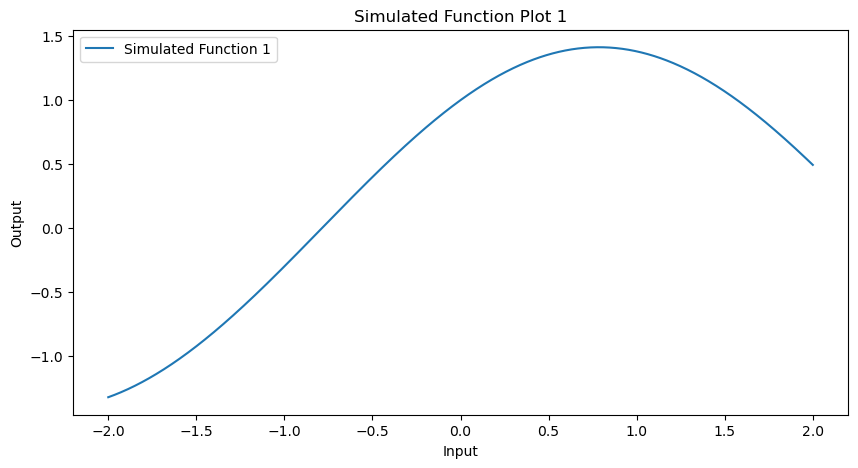

In [212]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

def simulate_function_1(x):
    return np.sin(x)+np.cos(x) 

x_train = np.linspace(-2, 2, 5000).reshape(5000,1)
y_train = simulate_function_1(x_train)

x_val = np.linspace(-2, 2, 1000).reshape(1000,1)
y_val = simulate_function_1(x_val)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

plt.figure(figsize=(10, 5))
plt.plot(x_val, y_val, label='Simulated Function 1')
plt.title('Simulated Function Plot 1')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.show()

In [213]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
    
        self.input_layer = nn.Linear(1, 50) 
        
        self.hidden_layers = nn.ModuleList([
            nn.Linear(50, 60),  
            nn.Linear(60, 30),
            nn.Linear(30, 20),
            nn.Linear(20, 10)
        ])
        
        self.output_layer = nn.Linear(10, 1)  

    def forward(self, x):
        x = self.input_layer(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = F.leaky_relu(x, negative_slope=0.2)
        
        output = self.output_layer(x)
        return output

In [214]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
    
        self.input_layer = nn.Linear(1, 50)  
        
        self.hidden_layers = nn.ModuleList([
            nn.Linear(50, 40), 
            nn.Linear(40, 30),
            nn.Linear(30, 20)
        ])
        
        self.output_layer = nn.Linear(20, 1)  

    def forward(self, x):
        x = self.input_layer(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = F.leaky_relu(x, negative_slope=0.2)
        
        output = self.output_layer(x)
        return output

In [215]:
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
    
        self.input_layer = nn.Linear(1, 50)  
        
        self.hidden_layers = nn.ModuleList([
            nn.Linear(50, 20)  
        ])
        
        self.output_layer = nn.Linear(20, 1)  

    def forward(self, x):
        x = self.input_layer(x)
        x = F.leaky_relu(x, negative_slope=0.2)
        
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)
            x = F.leaky_relu(x, negative_slope=0.2)
        
        output = self.output_layer(x)
        return output

In [216]:
model_1_1 = Model_1()
optimizer_1_1 = torch.optim.SGD(model_1_1.parameters(), lr = 1e-2)
loss_function = torch.nn.MSELoss()
model_1_1_total_params = sum(p.numel() for p in model_1_1.parameters())
print(f'Number of Model 1_1 Parameters: {model_1_1_total_params}')

model_1_2 = Model_2()
optimizer_1_2 = torch.optim.SGD(model_1_2.parameters(), lr = 1e-2)
loss_function = torch.nn.MSELoss()
model_1_2_total_params = sum(p.numel() for p in model_1_2.parameters())
print(f'Number of Model 1_2 Parameters: {model_1_2_total_params}')

model_1_3 = Model_3()
optimizer_1_3 = torch.optim.SGD(model_1_3.parameters(), lr = 1e-2)
loss_function = torch.nn.MSELoss()
model_1_3_total_params = sum(p.numel() for p in model_1_3.parameters())
print(f'Number of Model 1_3 Parameters: {model_1_3_total_params}')

Number of Model 1_1 Parameters: 5831
Number of Model 1_2 Parameters: 4011
Number of Model 1_3 Parameters: 1141


In [217]:
def train_model(model, optimizer, x_train, y_train):
    model.train()
    epochs = 15000
    tolerance = 1e-5
    losses = []
    prev_loss = float('inf')

    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = loss_function(outputs, y_train)
        loss.backward()
        optimizer.step()

        losses.append(loss.detach().numpy())

        if epoch % 150 == 0:
            print(f'Epoch: {epoch}, Loss = {loss.item():.4f}')

        if epoch > 0 and abs(prev_loss - loss.item()) < tolerance:
            print(f"Convergence reached at epoch {epoch} with Loss = {loss.item()}")
            break

        prev_loss = loss.item()

    return losses

In [218]:
model_1_1_loss = train_model(model_1_1, optimizer_1_1, x_train, y_train)
model_1_2_loss = train_model(model_1_2, optimizer_1_2, x_train, y_train)
model_1_3_loss = train_model(model_1_3, optimizer_1_3, x_train, y_train)

Epoch: 0, Loss = 1.0759
Epoch: 150, Loss = 0.5529
Epoch: 300, Loss = 0.1231
Epoch: 450, Loss = 0.0472
Epoch: 600, Loss = 0.0325
Epoch: 750, Loss = 0.0204
Epoch: 900, Loss = 0.0073
Epoch: 1050, Loss = 0.0033
Convergence reached at epoch 1093 with Loss = 0.002849731594324112
Epoch: 0, Loss = 0.8733
Epoch: 150, Loss = 0.0423
Epoch: 300, Loss = 0.0285
Epoch: 450, Loss = 0.0236
Epoch: 600, Loss = 0.0193
Epoch: 750, Loss = 0.0153
Epoch: 900, Loss = 0.0114
Epoch: 1050, Loss = 0.0073
Epoch: 1200, Loss = 0.0048
Convergence reached at epoch 1235 with Loss = 0.004449861124157906
Epoch: 0, Loss = 0.9226
Epoch: 150, Loss = 0.0673
Epoch: 300, Loss = 0.0294
Epoch: 450, Loss = 0.0167
Epoch: 600, Loss = 0.0102
Epoch: 750, Loss = 0.0066
Epoch: 900, Loss = 0.0045
Convergence reached at epoch 919 with Loss = 0.004342743195593357


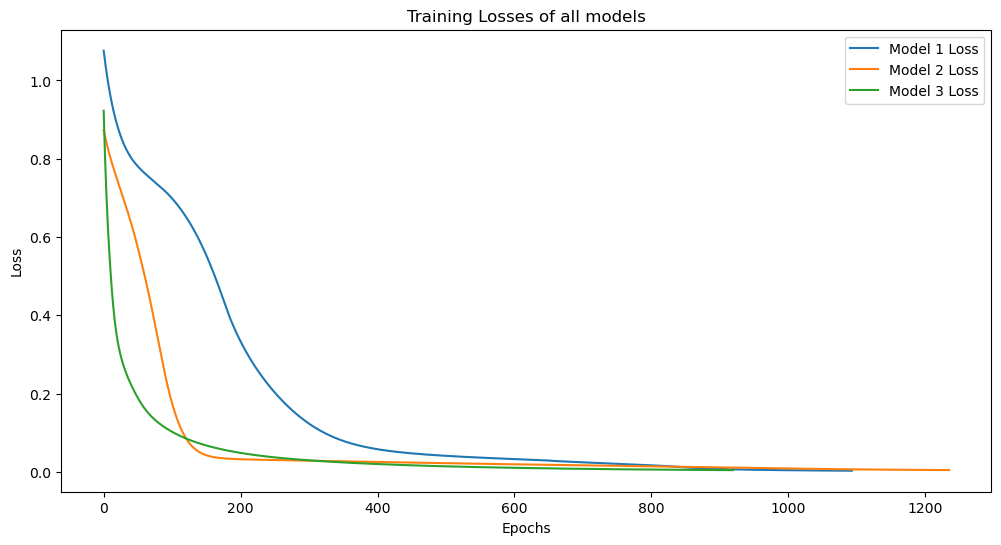

In [219]:
plt.figure(figsize=(12, 6))
plt.plot(model_1_1_loss, label='Model 1 Loss')
plt.plot(model_1_2_loss, label='Model 2 Loss')
plt.plot(model_1_3_loss, label='Model 3 Loss')
plt.title('Training Losses of all models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

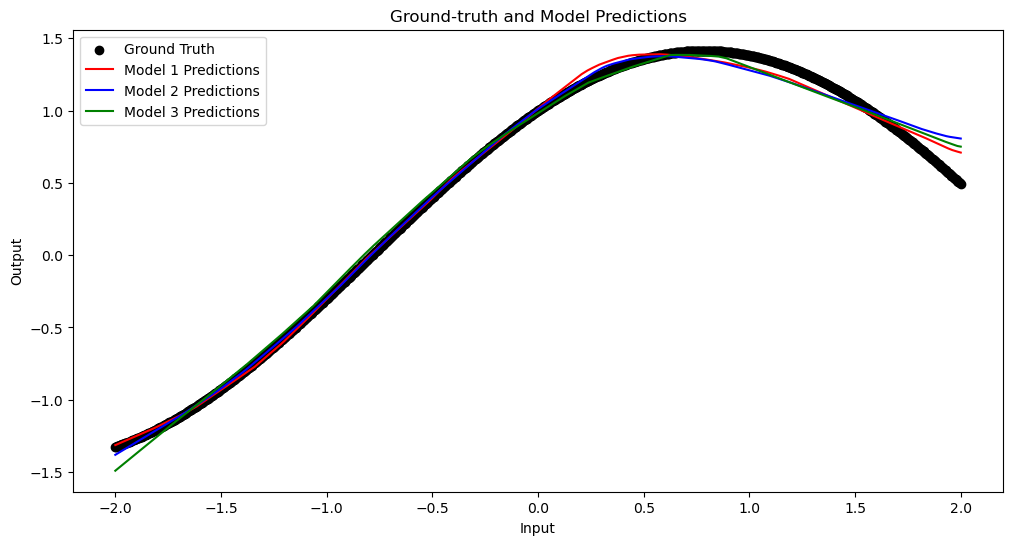

In [220]:
def get_predictions(models, x_values):
    predictions = []
    for model in models:
        model.eval()  
        with torch.no_grad():  
            predictions.append(model(x_values).numpy())
    return predictions

def plot_predictions(x_values, y_true, predictions, labels, colors):
    plt.figure(figsize=(12, 6))
    plt.scatter(x_values, y_true, color='black', label='Ground Truth')
    for pred, label, color in zip(predictions, labels, colors):
        plt.plot(x_values, pred, label=label, color=color)
    plt.title('Ground-truth and Model Predictions')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.show()


models = [model_1_1, model_1_2, model_1_3]
predictions = get_predictions(models, x_val)

labels = ['Model 1 Predictions', 'Model 2 Predictions', 'Model 3 Predictions']
colors = ['red', 'blue', 'green']
plot_predictions(x_val, y_val, predictions, labels, colors)


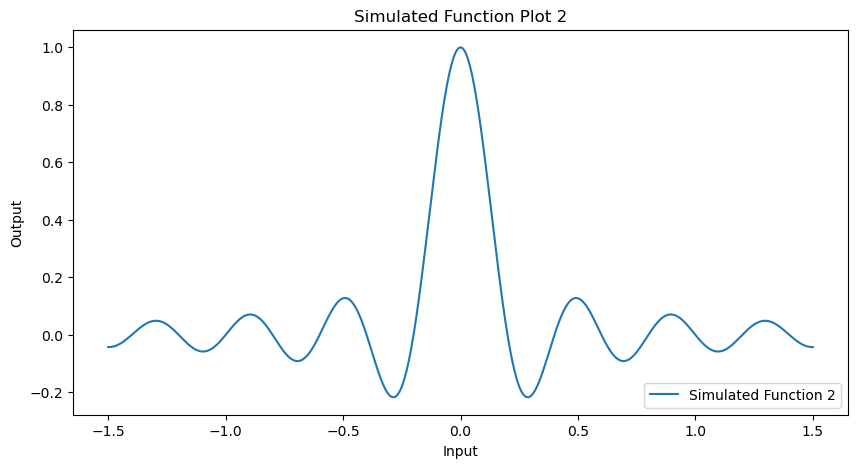

In [221]:
def simulate_function_2(x):
    return np.sinc(5*x)

x_train = np.linspace(-1.5, 1.5, int((3.0 / 0.01) + 1)).reshape(-1, 1)
y_train = simulate_function_2(x_train)

x_val = x_train
y_val = simulate_function_2(x_val)

x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
x_val = torch.tensor(x_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

plt.figure(figsize=(10, 5))
plt.plot(x_val, y_val, label='Simulated Function 2')
plt.title('Simulated Function Plot 2')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend(loc='lower right')
plt.show()

In [222]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()
        self.input_layer = nn.Linear(1, 5) 
        
        self.hidden_layers = nn.ModuleList([
            nn.Linear(5, 10),
            nn.Linear(10, 10),
            nn.Linear(10, 10),
            nn.Linear(10, 10),
            nn.Linear(10, 10),
            nn.Linear(10, 5)
        ])
        self.output_layer = nn.Linear(5, 1)

    def forward(self, x):
        x = F.leaky_relu(self.input_layer(x), negative_slope=0.2)
        for hidden_layer in self.hidden_layers:
            x = F.leaky_relu(hidden_layer(x), negative_slope=0.2)
        output = self.output_layer(x)
        return output

In [223]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.input_layer = nn.Linear(1, 10)
        self.hidden_layers = nn.ModuleList([
            nn.Linear(10, 17),
            nn.Linear(17, 14),
            nn.Linear(14, 6)  
        ])
        self.output_layer = nn.Linear(6, 1)

    def forward(self, x):
        x = F.leaky_relu(self.input_layer(x), negative_slope=0.2)
        for hidden_layer in self.hidden_layers:
            x = F.leaky_relu(hidden_layer(x), negative_slope=0.2)
        output = self.output_layer(x)
        return output

In [224]:
class Model_3(nn.Module):
    def __init__(self):
        super(Model_3, self).__init__()
        self.input_layer = nn.Linear(1, 182)  
        self.output_layer = nn.Linear(182, 1)

    def forward(self, x):
        x = F.leaky_relu(self.input_layer(x), negative_slope=0.2)
        output = self.output_layer(x)
        return output

In [230]:
model_2_1 = Model_1()

optimizer_2_1 = torch.optim.Adam(model_2_1.parameters(), lr = 1e-2)
loss_function = torch.nn.MSELoss()
model_2_1_total_params = sum(p.numel() for p in model_2_1.parameters())
print(f'Number of Model 2_1 Parameters: {model_2_1_total_params}')

model_2_2 = Model_2()

optimizer_2_2 = torch.optim.Adam(model_2_2.parameters(), lr = 1e-2)
loss_function = torch.nn.MSELoss()
model_2_2_total_params = sum(p.numel() for p in model_2_2.parameters())
print(f'Number of Model 2_2 Parameters: {model_2_2_total_params}')

model_2_3 = Model_3()

optimizer_2_3 = torch.optim.Adam(model_2_3.parameters(), lr = 1e-2)
loss_function = torch.nn.MSELoss()
model_2_3_total_params = sum(p.numel() for p in model_2_3.parameters())
print(f'Number of Model 2_3 Parameters: {model_2_3_total_params}')

Number of Model 2_1 Parameters: 571
Number of Model 2_2 Parameters: 556
Number of Model 2_3 Parameters: 547


In [231]:
model_2_1_loss = train_model(model_2_1, optimizer_2_1, x_train, y_train)
model_2_2_loss = train_model(model_2_2, optimizer_2_2, x_train, y_train)
model_2_3_loss = train_model(model_2_3, optimizer_2_3, x_train, y_train)

Epoch: 0, Loss = 0.1749
Convergence reached at epoch 38 with Loss = 0.06112312898039818
Epoch: 0, Loss = 0.1149
Convergence reached at epoch 101 with Loss = 0.004747811704874039
Epoch: 0, Loss = 0.0671
Convergence reached at epoch 49 with Loss = 0.04967945069074631


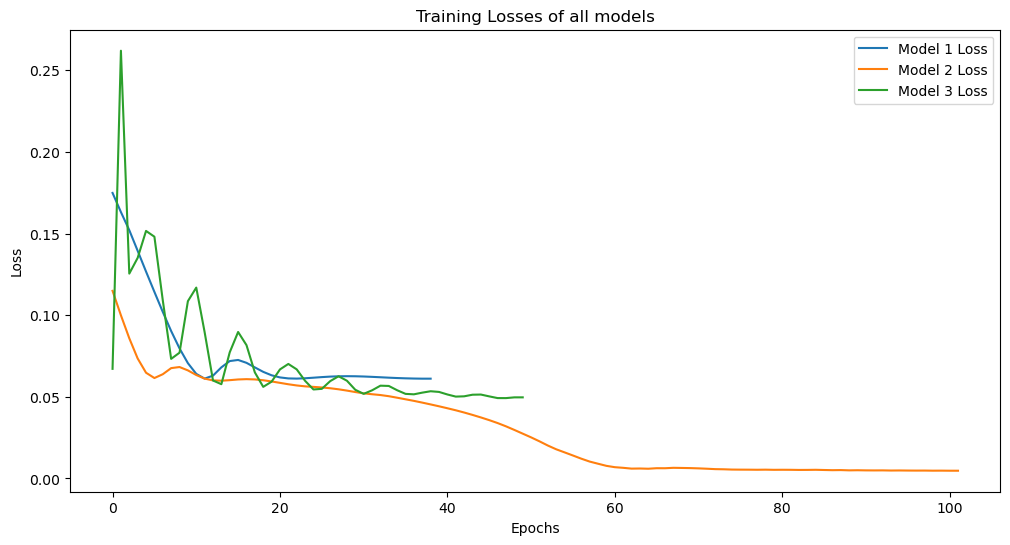

In [232]:
plt.figure(figsize=(12, 6))
plt.plot(model_2_1_loss, label='Model 1 Loss')
plt.plot(model_2_2_loss, label='Model 2 Loss')
plt.plot(model_2_3_loss, label='Model 3 Loss')
plt.title('Training Losses of all models')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

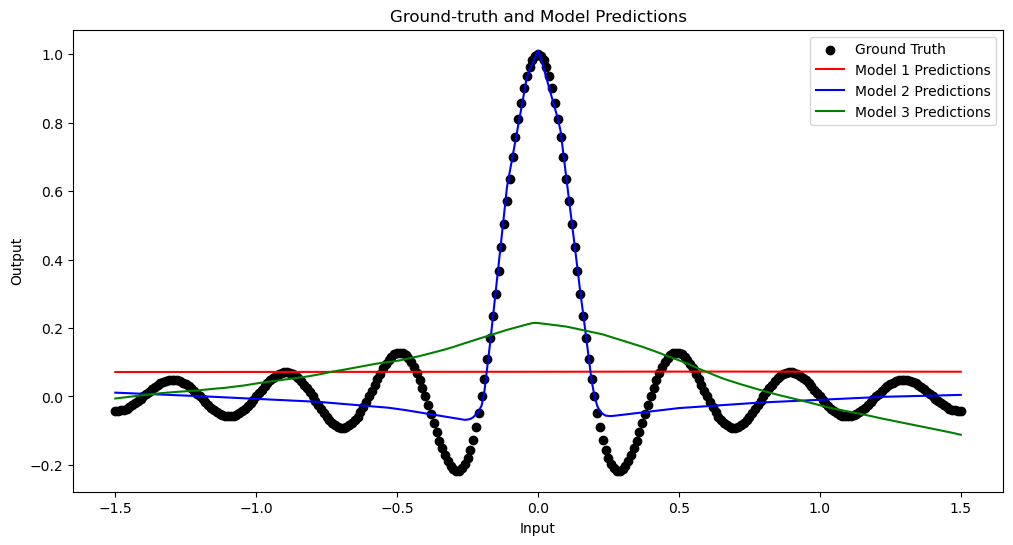

In [233]:
def get_predictions(models, x_values):
    predictions = []
    for model in models:
        model.eval()  
        with torch.no_grad():  
            predictions.append(model(x_values).numpy())
    return predictions

def plot_predictions(x_values, y_true, predictions, labels, colors):
    plt.figure(figsize=(12, 6))
    plt.scatter(x_values, y_true, color='black', label='Ground Truth')
    for pred, label, color in zip(predictions, labels, colors):
        plt.plot(x_values, pred, label=label, color=color)
    plt.title('Ground-truth and Model Predictions')
    plt.xlabel('Input')
    plt.ylabel('Output')
    plt.legend()
    plt.show()


models = [model_2_1, model_2_2, model_2_3]
predictions = get_predictions(models, x_val)

labels = ['Model 1 Predictions', 'Model 2 Predictions', 'Model 3 Predictions']
colors = ['red', 'blue', 'green']
plot_predictions(x_val, y_val, predictions, labels, colors)
